In [2]:
import os,sys
import pathlib
sys.path.append(os.path.abspath('./practico4'))

In [13]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
def theta_calculator(declination,rigth_ascension,z):
    """
    Parameters
    ----------
        declination: np.ndarray of declination values for each galaxy.
        rigth_ascension: np.ndarray of ra values for each galaxy.

    Returns
    -------
        Array of arrays of 10 elements of theta.

    Notes
    -----
        For each galaxy we compute the distance by means of theta to the other
        galaxies that surround it.

        Calculation is this way: take a galaxy from the collection, and perform
        t calculation with each other galaxy in the collection.

        Take te first 10 values (first sort ascending), not counting the 0
        value which is the distance to itself.
    """
    # Speed of light [km]/[s]
    c = 300000
    # Work with numpy arrays.
    declination = np.array(declination)
    rigth_ascension = np.array(rigth_ascension)*np.pi/180
    # First transform declination accordingtho the Absolute equatorial system.
    declination = 90 - declination
    declination = declination*np.pi/180


    # GET D
    big_d = 300000*z/70 # H0 = 70
    theta = []
    # all vs all
    for dec_ra in zip(declination,rigth_ascension):
        cos_t = np.cos(dec_ra[0])*np.cos(declination) + np.sin(dec_ra[0])*np.sin(declination)*np.cos(dec_ra[1]-rigth_ascension)
        tan_t = np.sqrt(1-cos_t**2)/cos_t
        t = big_d*tan_t

        t = np.sort(t)[1:11]
        t = t[-1]
        theta.append(t)
    return np.array(theta)

In [57]:
gal = pd.read_csv("practico4/galaxias.dat",delim_whitespace=True,header=0)
centers = pd.read_csv("practico4/centros.dat",delim_whitespace=True,header=0)

In [58]:
cls = np.array(pd.unique(centers["cls,"]))
redshift = np.array(centers["redshift_cls,"])


In [85]:
d = np.array([])
for c in zip(cls,redshift):
    ra = np.array(gal[gal["cls"]==c[0]].loc[:,"ra"])
    dec = np.array(gal[gal["cls"]==c[0]].loc[:,"dec"])
    t = theta_calculator(dec,ra,c[1])
    # distances.append(t)
    d = np.concatenate((d,t),axis=None)


/tmp/ipykernel_188363/129059858.py:39: RuntimeWarning: invalid value encountered in sqrt
  tan_t = np.sqrt(1-cos_t**2)/cos_t


In [88]:

a10 = np.pi*d**2
rho = np.log10(10/a10)

<Axes: ylabel='Count'>

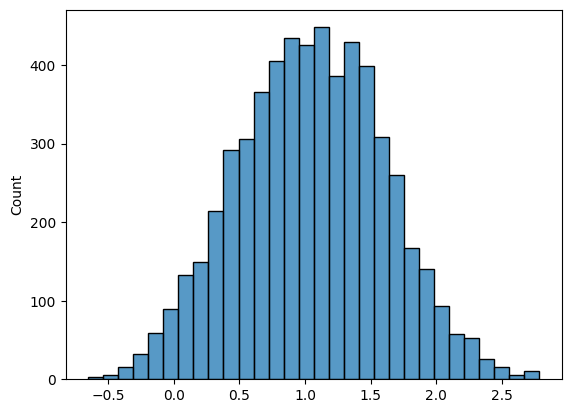

In [91]:
import seaborn as sns
sns.histplot(rho,bins=30)

In [111]:
# Calculemos primero el histrograma:
counts,bins = np.histogram(rho,bins=30)
g11 = gal[(gal["cls"]==1)&(gal["ty"]==1)]
g = theta_calculator(g11.ra,g11.dec,centers["redshift_cls,"][0])


In [108]:
centers

,"cls,","num_de_miembros,","redshift_cls,","ra_csl,",dec_cls
0,1,79,0.064,3.1750,-24.1667
1,2,73,0.038,9.3000,6.5000
2,3,118,0.042,13.4500,-1.5333
3,4,105,0.053,16.6000,-15.6833
4,5,80,0.066,17.0750,17.4000
5,6,106,0.045,18.1500,-0.0167
6,7,75,0.018,20.7500,-1.7667
7,8,120,0.047,40.6750,36.6500
8,9,92,0.023,43.7500,5.8333
9,10,85,0.036,67.8250,-13.3500
